# REPORTE PRÁCTICA 13: Análisis de imágenes

# Análisis de Datos Multivariado 

#  Caso de Estudio: 
## Condiciones en los Centros de Reinserción Social CERESO y Topo Chico   


####    Evely Gutiérrez Noda     #1935050


# Introducción

En el siguiente reporte se analiza el caso de estudio de los internos del CERESO "Apodaca" y el Centro Preventivo de Reinserción Topo Chico. Los datos que se usan para este estudio provienen de encuestas realizadas a mujeres y hombres, que se encuentran privados de libertad dentro del Centro de Reinserción.

Esta práctica tiene como objetivo extraer la información posible que se encuentra en formato imagen referente al caso de estudio de los internos. Las imágenes que se utilizan para realizar el trabajo no están en una base de datos, estas se encuentran en libros que han sido redactados a partir de información obtenida de las encuestas realizadas a los internos. En estos libros se encuentran imágenes de las pinturas echas por los internos durante su periodo de privación de la libertad. 

Para comenzar el trabajo se necesita instalar las librerías `OpenCV` y `Pillow` desde la consola, ya que estas cuentan con funcionalidades para el análisis de imágenes permitiendo acceder a la información que puedan tener. Estas librerías se instalan con las siguientes líneas en consola:

 `pip3 install opencv-python`
 `pip3 install Pillow`

Como las imágenes que se van a utilizar están en un libro físico, se toman fotografías a estas y se guardan en PNG ya que es un formato que permite el acceso a los pixeles. Se utilizan 3 dibujos de los internos con los nombres "Mi Sueño", "Mundo Feliz", "Descubre la luz al salir".

Se intenta interpretar los dibujos de los internos ya que de algún modo podrían influir en su estado de ánimo, del modo que, a mayor cantidad de dibujo en la hoja, pudiera ser mayor frustración o depresión del interno. Basándose en esta hipótesis podría ser que, a mayor cantidad de pixeles negros en la imagen, mayor cantidad de dibujo y por consecuente mayor frustración o depresión. 

Para empezar, se elimina el color de fondo para el caso de que las hojas hayan sido de color, luego se convierte todo el texto a un mismo color para el caso de que utilicen varios colores de tinta al dibujar. Este proceso se conoce como binarización de imagen y se logra en este caso en `Python` con la librería `Pillow`.


(1162, 914)


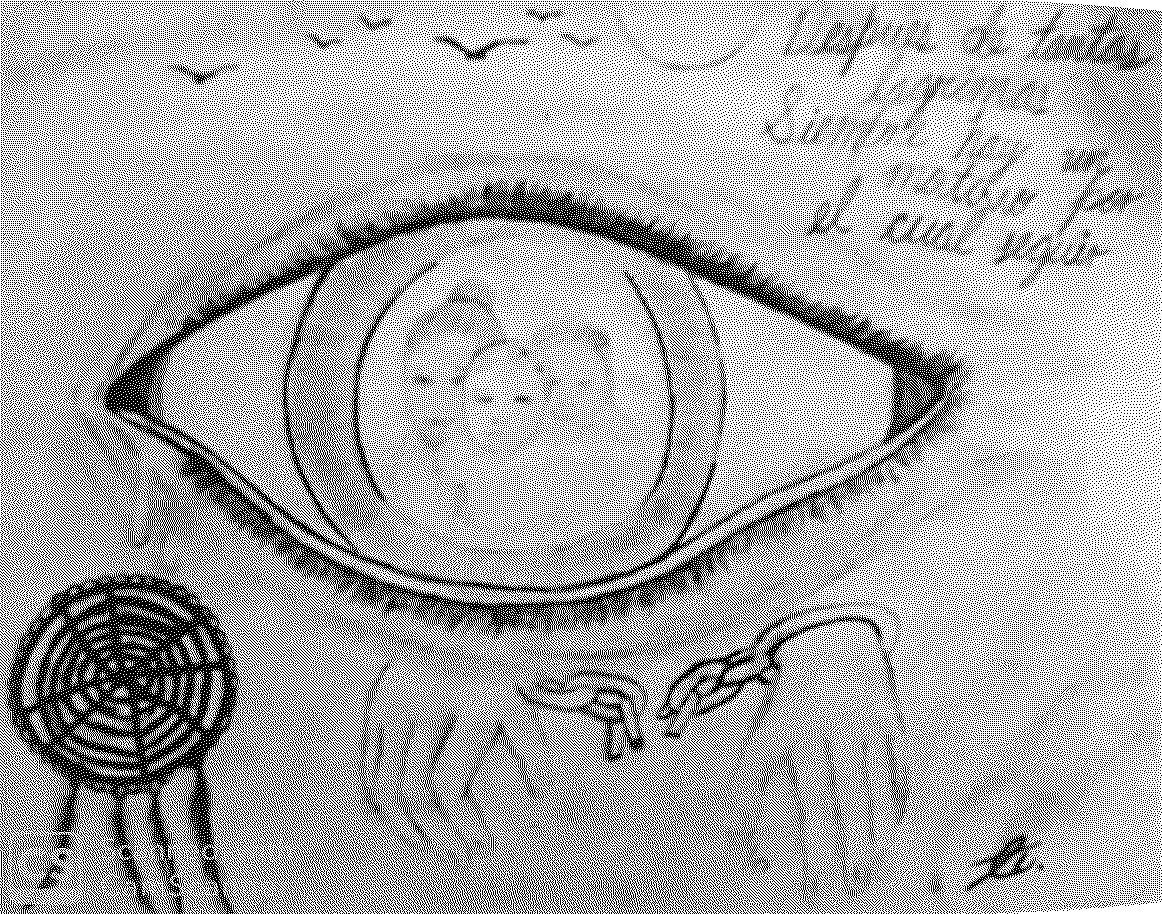

In [67]:
from PIL import Image
imagen = Image.open("imagen1.png")
nuevo = imagen.convert('1') 
print(nuevo.size)
nuevo

Ya queda la imagen en blanco y negro, pero tiene muchos pixeles aislados que pudieran no pertenecer al dibujo. Se intenta eliminar los pixeles aislados que no tienen ninguno adyacente.

76635 pixeles negros aislados eliminados


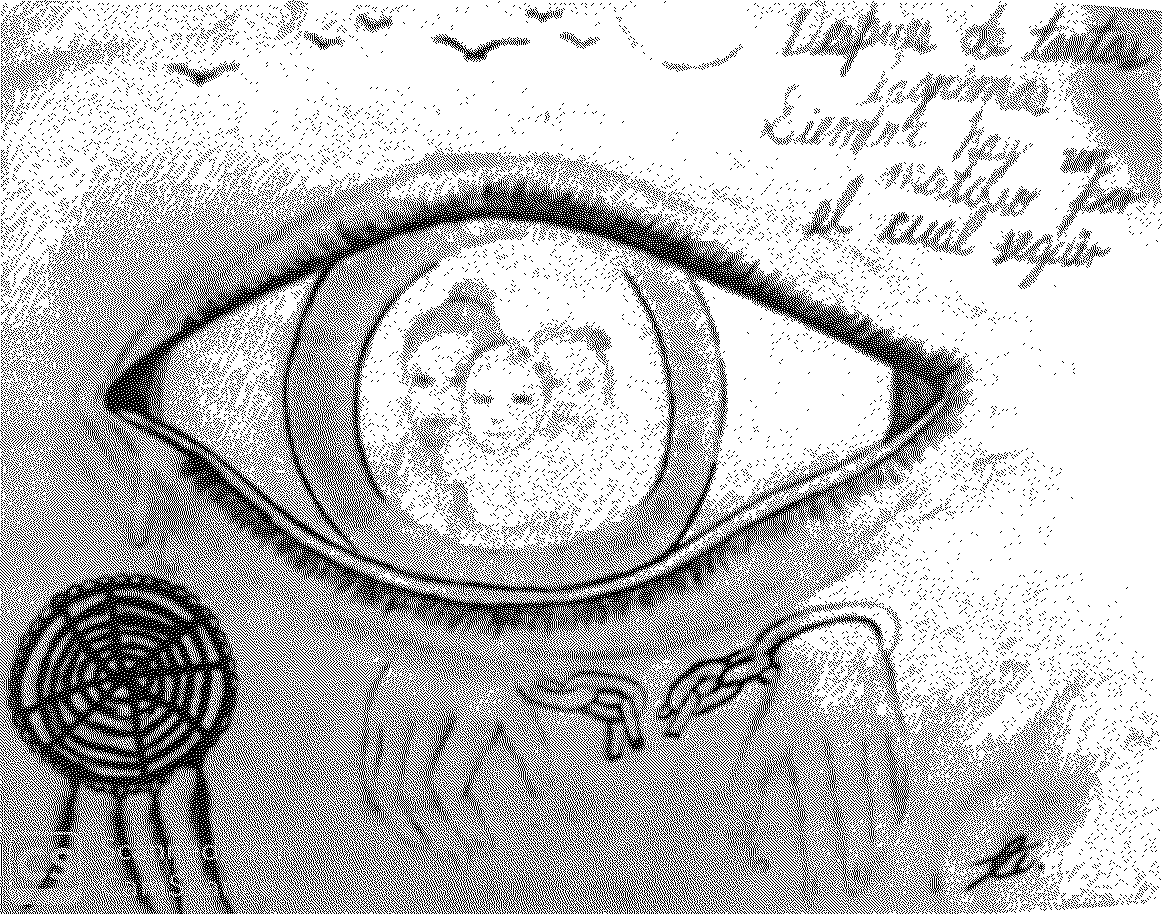

In [21]:
import ssl
import requests
from PIL import Image
 
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

imagen = Image.open("imagen1.jpg")
nuevo = imagen.convert('1') 
P = nuevo.load()
ancho, altura = nuevo.size
borrados = 0
vecinos = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
for fila in range(altura):
    for columna in range(ancho):
        if P[columna, fila] == 0: # pixel es negro
            tiene = False
            for (df, dc) in vecinos:
                vf = fila + df
                vc = columna + dc
                if vf >= 0 and vc >= 0 and vf < altura and vc < ancho: # si existe el vecino
                    if P[vc, vf] == 0:
                        tiene = True
                        break # no hace falta seguir examinando
            if not tiene: # no tenía vecino negro
                P[columna, fila] = 255 # será blanco
                borrados += 1
print(borrados, "pixeles negros aislados eliminados")
nuevo

Se eliminan 76635 pixeles negros y se nota alguna mejoría en algunas partes de la imagen, sobre todo a la derecha, pero aún quedan muchas zonas con pixeles negros aislados, queda mucho ruido en el fondo aún. Se intenta quitar los pixeles que solo tienen un vecino negro para lograr menos ruido en el fondo.

156117 pixeles negros eliminados


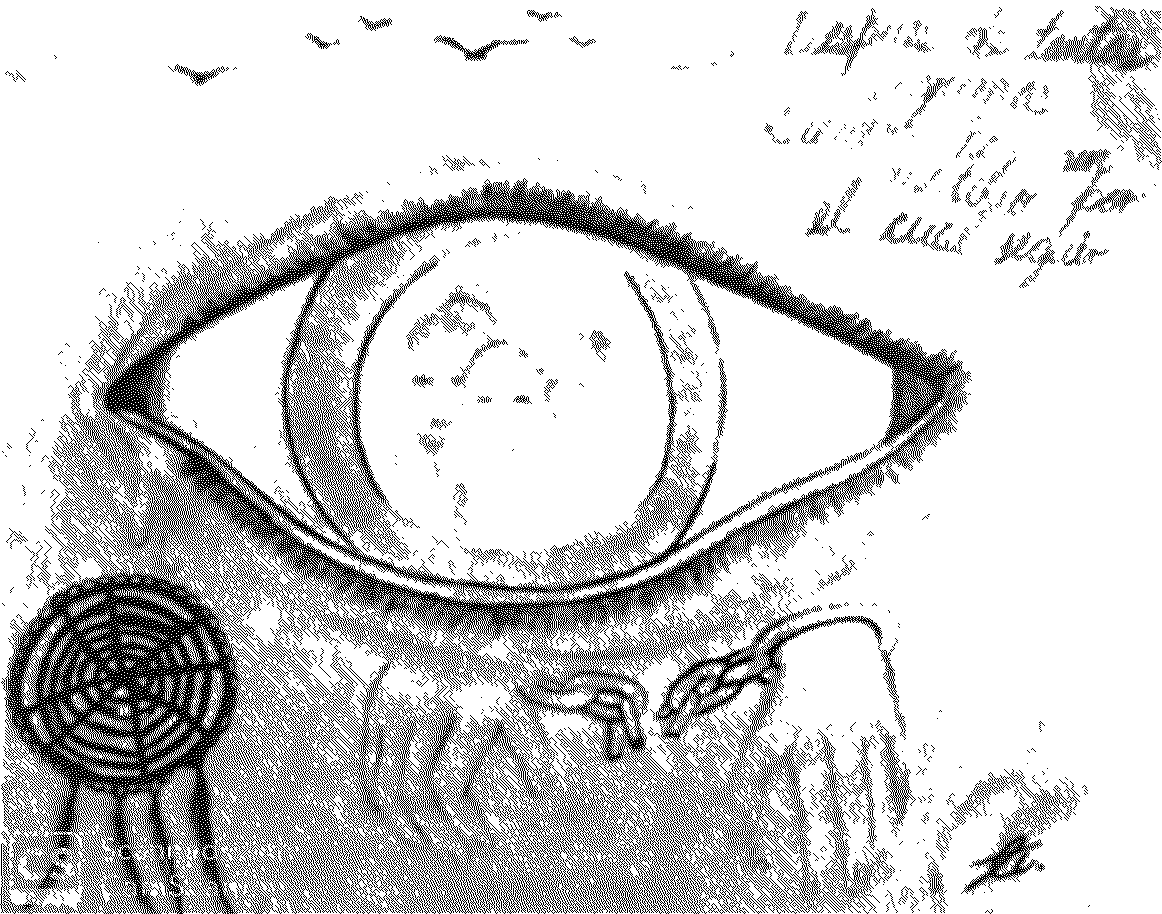

In [22]:
import ssl
import requests
from PIL import Image
 
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

imagen = Image.open("imagen1.jpg")
nuevo = imagen.convert('1') 
P = nuevo.load()
ancho, altura = nuevo.size
borrados = 0
vecinos = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
for fila in range(altura):
    for columna in range(ancho):
        if P[columna, fila] == 0: # pixel es negro
            contador = 0
            for (df, dc) in vecinos:
                vf = fila + df
                vc = columna + dc
                if vf >= 0 and vc >= 0 and vf < altura and vc < ancho: # si existe el vecino
                    if P[vc, vf] == 0:
                        contador += 1
            if contador < 2: # uno o cero vecinos negros
                P[columna, fila] = 255 # será blanco
                borrados += 1
print(borrados, "pixeles negros eliminados")
nuevo

Continúa mejorando ya que se eliminaron 156117 pixeles, pero aun la parte izquierda de la imagen queda con mucho ruido, esto pudiera ser a causa de alguna sombra al tomar la fotografía del libro. Se realiza un conteo de pixeles para conocer el porcentaje de estos que quedaron negros para conocer cuanto dibujo el interno en esa imagen.

In [58]:
import ssl
import requests
from PIL import Image, ImageDraw
 
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

imagen = Image.open("imagen1.jpg")
n = imagen.convert('1') 
w, h = n.size
rgb = n.convert('RGB')
P = rgb.load()
negro = (0, 0, 0)
blanco = (255, 255, 255)
for f in range(h): # bordes verticales
    if P[0, f] == negro:
        ImageDraw.floodfill(rgb, (0, f), blanco)
    if P[w - 1, f] == negro:
        ImageDraw.floodfill(rgb, (w - 1, f), blanco)
for c in range(w): # bordes horizontales
    if P[c, 0] == negro:
        ImageDraw.floodfill(rgb, (c, 0), blanco)
    if P[c, h - 1] == negro:
        ImageDraw.floodfill(rgb, (c, h - 1), blanco) 
n = rgb.convert('1') 
P = n.load()
V = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
negros = 0
totales = w * h
for f in range(1, h - 1): # sin bordes ahora
    for c in range(1, w - 1):
        if P[c, f] == 0: 
            cont = 0
            for (df, dc) in V:
                if P[c + dc, f + df] == 0: # siempre existen
                    cont += 1
            if cont < 2:
                P[c, f] = 255 #  blanco
            else:
                negros += 1
print('{:.2f} porciento negro'.format(100 * negros / totales))

18.06 porciento negro


Se compara con las otras dos imágenes.

In [ ]:
E:\Maestria\4rto semestre\Analisis Estadistico Multivariado>curl -o imagen2.png https://github.com/EvelyGutierrez/Analisis-Estadistico-Multivariado/blob/master
imagen2.png
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63075    0 63075    0     0   116k      0 --:--:-- --:--:-- --:--:--  116k

E:\Maestria\4rto semestre\Analisis Estadistico Multivariado>curl -o imagen3.png https://github.com/EvelyGutierrez/Analisis-Estadistico-Multivariado/blob/master
imagen3.png
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current 
                                 Dload  Upload   Total   Spent    Left  Speed
100 63075    0 63075    0     0  73513      0 --:--:-- --:--:-- --:--:-- 73513
                        


In [30]:
import ssl
import requests
from PIL import Image, ImageDraw
 
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

for ejemplo in range(1, 4): # de uno a cinco
    #url = 'https://github.com/EvelyGutierrez/Analisis-Estadistico-Multivariado/imagen{:d}.png'.format(ejemplo)
    if ejemplo == 1:
        imagen = Image.open("imagen1.png")
    if ejemplo == 2:   
        imagen = Image.open("imagen2.png")
    if ejemplo == 3:   
        imagen = Image.open("imagen3.png")
    n = imagen.convert('1') 
    w, h = n.size
    rgb = n.convert('RGB')
    P = rgb.load()
    negro = (0, 0, 0)
    blanco = (255, 255, 255)
    for f in range(h): # bordes verticales
        if P[0, f] == negro:
            ImageDraw.floodfill(rgb, (0, f), blanco)
        if P[w - 1, f] == negro:
            ImageDraw.floodfill(rgb, (w - 1, f), blanco)
    for c in range(w): # bordes horizontales
        if P[c, 0] == negro:
            ImageDraw.floodfill(rgb, (c, 0), blanco)
        if P[c, h - 1] == negro:
            ImageDraw.floodfill(rgb, (c, h - 1), blanco) 
    n = rgb.convert('1') 
    P = n.load()
    V = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    negros = 0
    for f in range(1, h - 1): # sin bordes ahora
        for c in range(1, w - 1):
            if P[c, f] == 0: 
                cont = 0
                for (df, dc) in V:
                    if P[c + dc, f + df] == 0: # siempre existen
                        cont += 1
                if cont < 2:
                    P[c, f] = 255 #  blanco
                else:
                    negros += 1
   
    print('Ejemplo {:d}:\t{:d} pixeles de texto'.format(ejemplo, negros)) 

Ejemplo 1:	191682 pixeles de texto
Ejemplo 2:	155414 pixeles de texto
Ejemplo 3:	209351 pixeles de texto


Luego se revisa como quedaron las imágenes binarizadas utilizando el mismo procedimiento anterior de borrado de pixeles en las 3 imágenes.

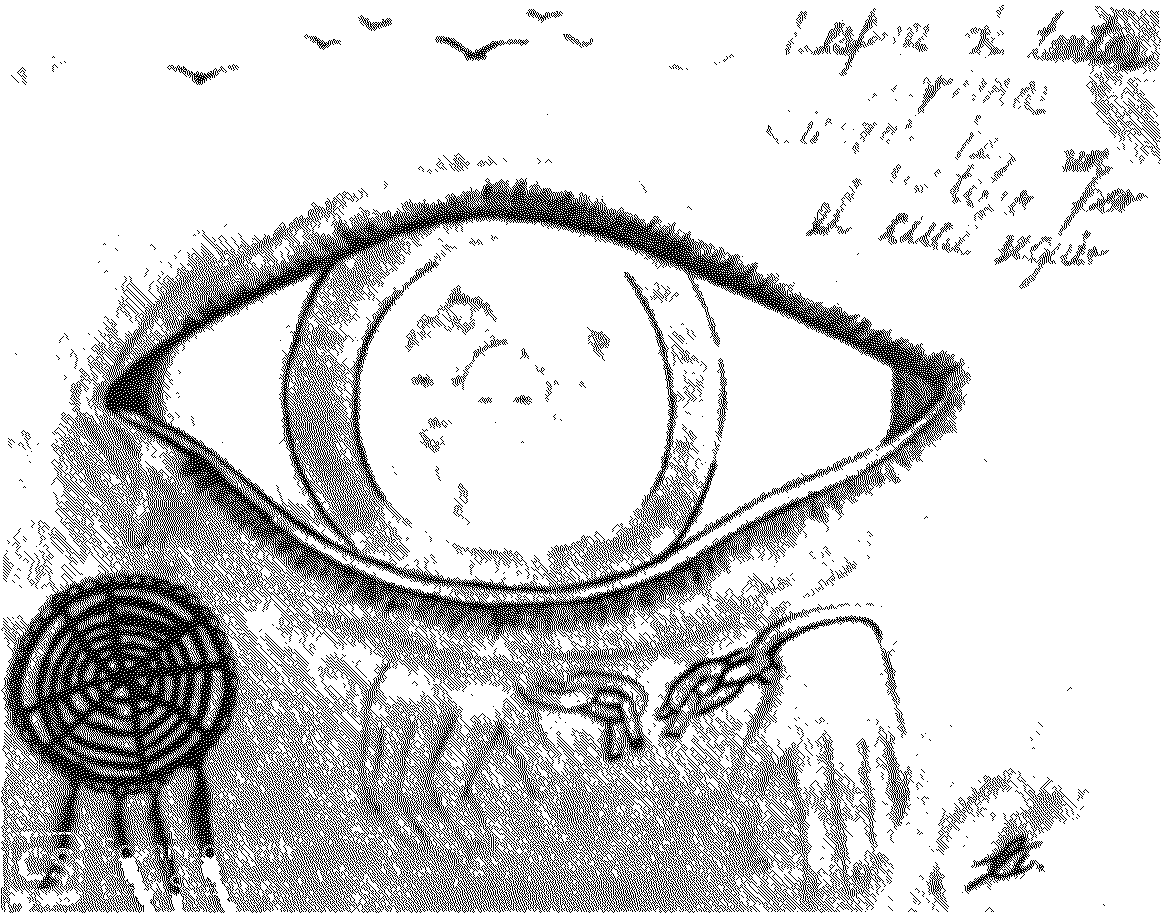

In [45]:
import ssl
import requests
from PIL import Image, ImageDraw
 
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

for ejemplo in range(1, 4): # de uno a cinco
    if ejemplo == 1:
        imagen = Image.open("imagen1.png")
    if ejemplo == 2:   
        imagen = Image.open("imagen2.png")
    if ejemplo == 3:   
        imagen = Image.open("imagen3.png")
    n = imagen.convert('1') 
    w, h = n.size
    rgb = n.convert('RGB')
    P = rgb.load()
    negro = (0, 0, 0)
    blanco = (255, 255, 255)
    for f in range(h): # bordes verticales
        if P[0, f] == negro:
            ImageDraw.floodfill(rgb, (0, f), blanco)
        if P[w - 1, f] == negro:
            ImageDraw.floodfill(rgb, (w - 1, f), blanco)
    for c in range(w): # bordes horizontales
        if P[c, 0] == negro:
            ImageDraw.floodfill(rgb, (c, 0), blanco)
        if P[c, h - 1] == negro:
            ImageDraw.floodfill(rgb, (c, h - 1), blanco) 
    n = rgb.convert('1') 
    P = n.load()
    V = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    for f in range(1, h - 1): # sin bordes ahora
        for c in range(1, w - 1):
            if P[c, f] == 0: 
                cont = 0
                for (df, dc) in V:
                    if P[c + dc, f + df] == 0: # siempre existen
                        cont += 1
                if cont < 2:
                    P[c, f] = 255 #  blanco
    n.save('bin_{:d}.png'.format(ejemplo))


imagen1 = Image.open("bin_1.png")
imagen1   
       
           

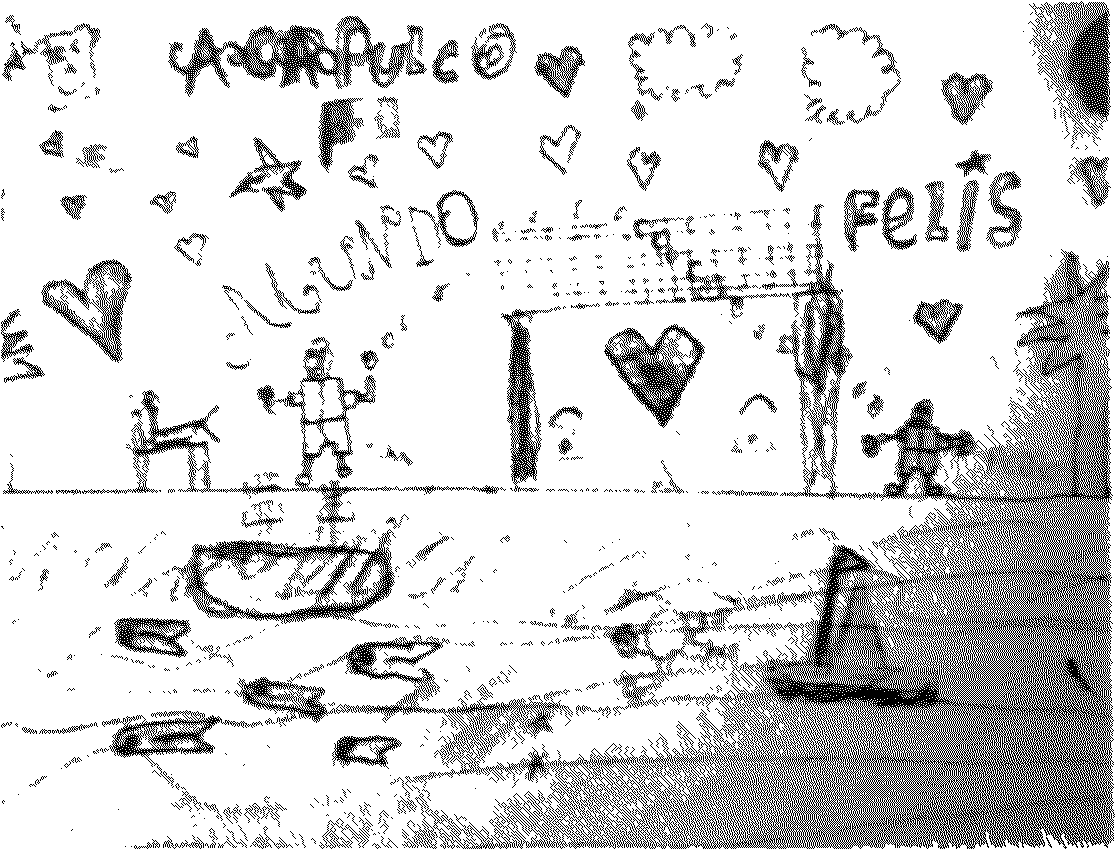

In [43]:
imagen2 = Image.open("bin_2.png")
imagen2

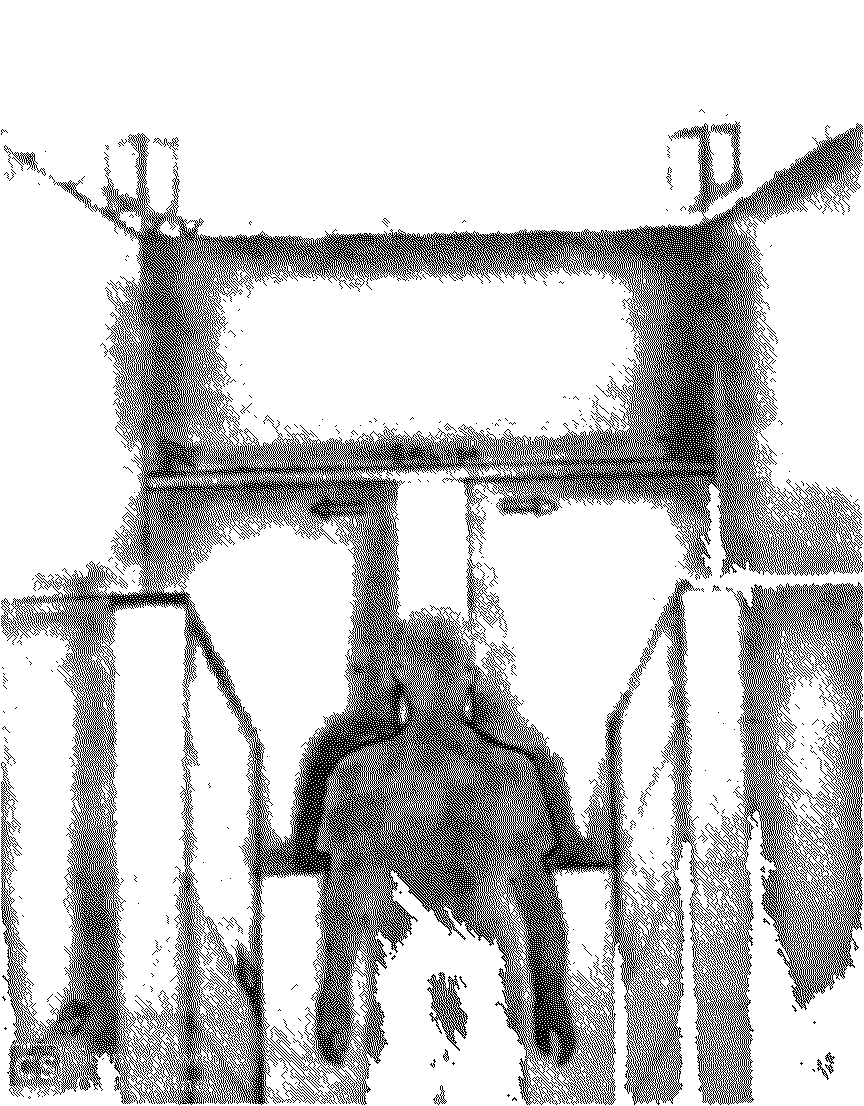

In [44]:
imagen3 = Image.open("bin_3.png")
imagen3

Funciona bastante parecido en las 1ras dos imágenes, pero como los dibujos de los internos generalmente tienen sombras echas con el lápiz afecta mucho este proceso dejando mucho ruido en el fondo, además de que son copias de los dibujos, no los originales.

Como la binarizacion no funciona muy bien en este tipo de imágenes, se prueba con otro proceso, convirtiendo en blanco todos los pixeles que no sean negros y se binariza levemente. Esto se logra convirtiendo la imagen a RGB.


In [46]:
import ssl
import requests
from PIL import Image, ImageDraw
 
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

negro = (0, 0, 0)
blanco = (255, 255, 255)
umbral = 90 # tomó un poco de búsqueda binaria para hallarle un valor que funcione
    
for ejemplo in range(1, 4): # de uno a cinco
   
    if ejemplo == 1:
        imagen = Image.open("imagen1.png")
    if ejemplo == 2:   
        imagen = Image.open("imagen2.png")
    if ejemplo == 3:   
        imagen = Image.open("imagen3.png")
     
    n = imagen.convert('RGB') 
    w, h = n.size
    P = n.load()
    for f in range(h): # bordes verticales
        if P[0, f] == negro:
            ImageDraw.floodfill(n, (0, f), blanco)
        if P[w - 1, f] == negro:
            ImageDraw.floodfill(n, (w - 1, f), blanco)
    for c in range(w): # bordes horizontales
        if P[c, 0] == negro:
            ImageDraw.floodfill(n, (c, 0), blanco)
        if P[c, h - 1] == negro:
            ImageDraw.floodfill(n, (c, h - 1), blanco) 
    for f in range(h): 
        for c in range(w):
            rgb = P[c, f]
            if max(rgb) - min(rgb) > umbral: # tiene un color que no es gris 
                P[c, f] = blanco
    b = n.convert('1') # binaricemos lo que queda
    b.save('rgb_{:d}.png'.format(ejemplo))

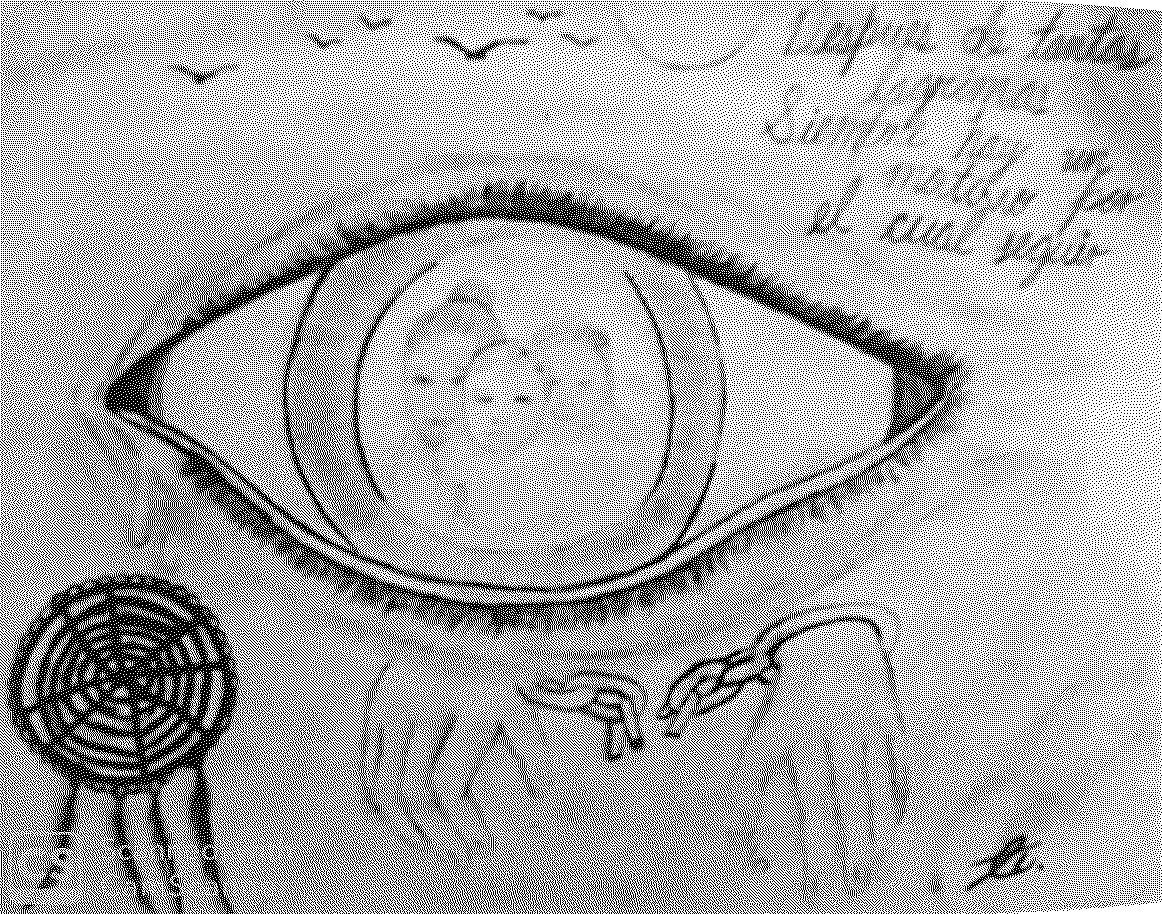

In [47]:
imagen1 = Image.open("rgb_1.png")
imagen1

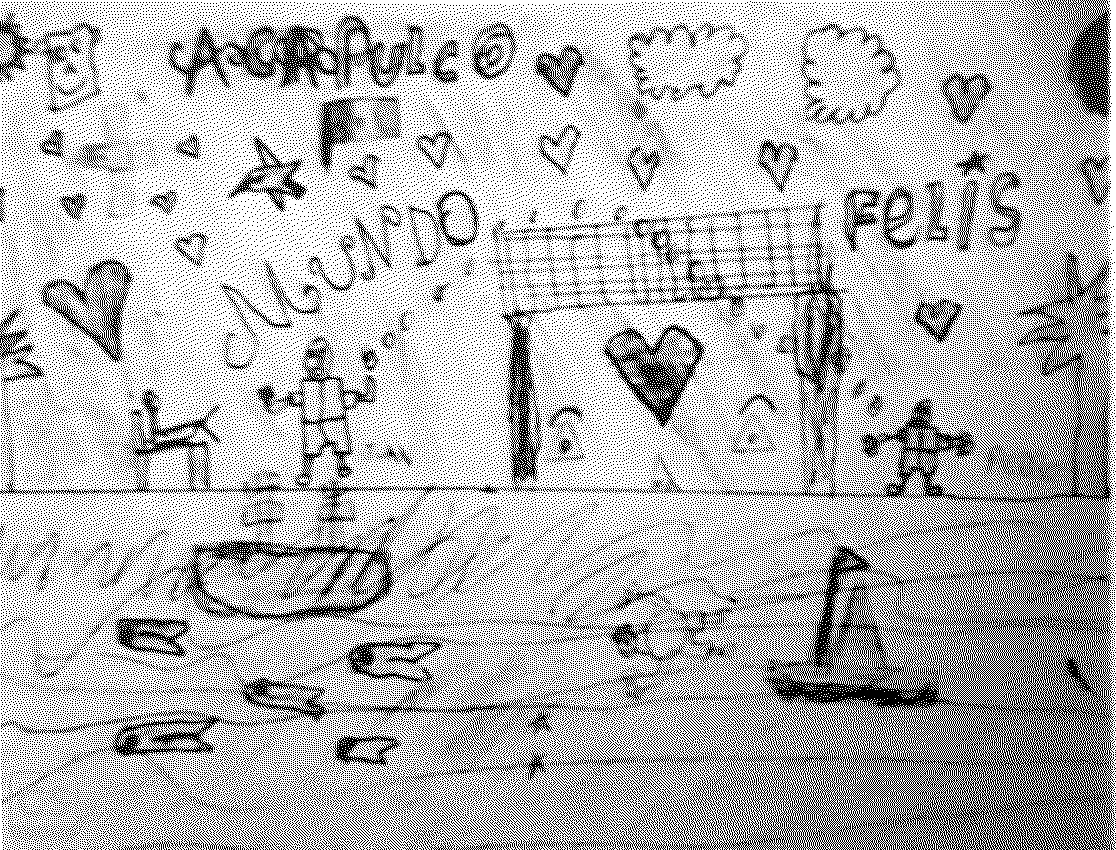

In [48]:
imagen1 = Image.open("rgb_2.png")
imagen1

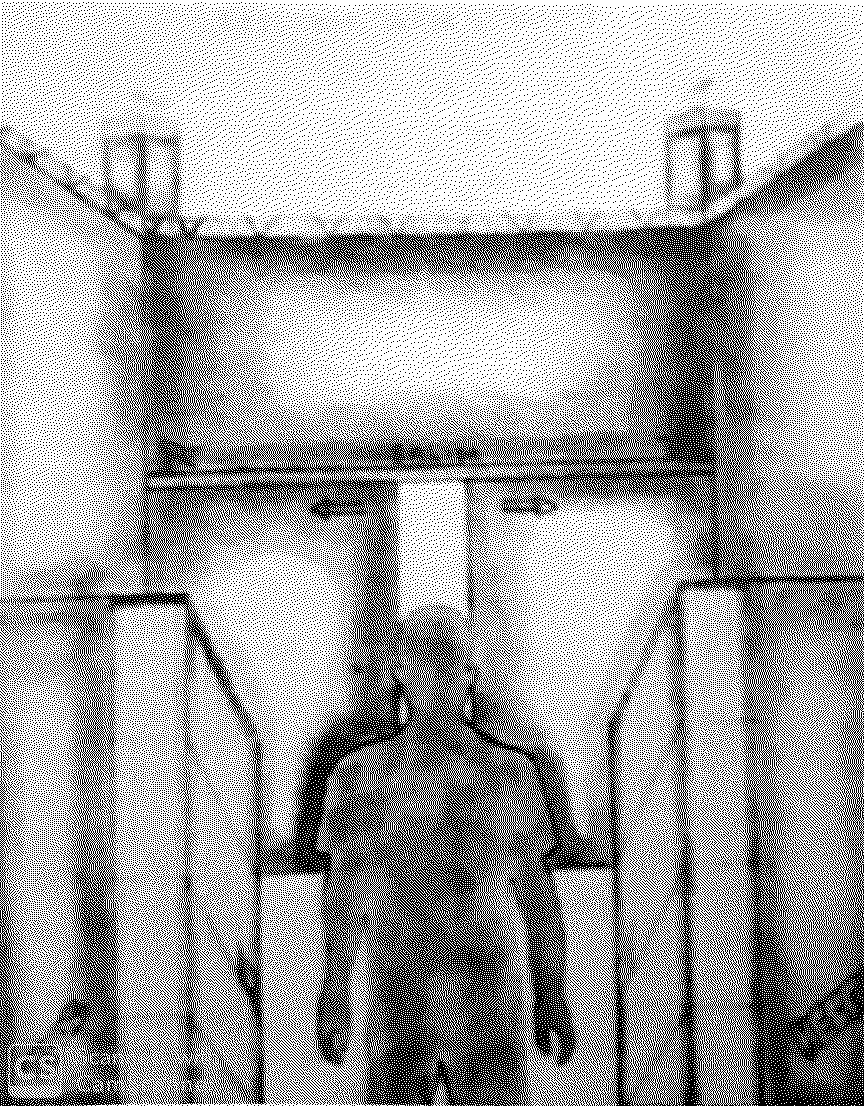

In [49]:
imagen1 = Image.open("rgb_3.png")
imagen1

El cambio no es mucho con respecto a las imágenes originales, al parecer fue mejor el proceso de borrar pixeles negros aislados, ya que se logró algunos espacios completos en blanco, en cambio con el proceso de forzar a blanco los pixeles no negros, se logra solamente aclarar un poco las imágenes. De igual modo se realiza nuevamente un conteo de pixeles negros para ver como quedaron con este proceso convirtiendo la imagen a RGB.

In [50]:
import ssl
import requests
from PIL import Image, ImageDraw
 
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

negro = (0, 0, 0)
blanco = (255, 255, 255)
umbral = 90 
    
for ejemplo in range(1, 4): # de uno a cinco
    if ejemplo == 1:
        imagen = Image.open("imagen1.png")
    if ejemplo == 2:   
        imagen = Image.open("imagen2.png")
    if ejemplo == 3:   
        imagen = Image.open("imagen3.png")
    n = imagen.convert('RGB') 
    w, h = n.size
    P = n.load()
    for f in range(h): # bordes verticales
        if P[0, f] == negro:
            ImageDraw.floodfill(n, (0, f), blanco)
        if P[w - 1, f] == negro:
            ImageDraw.floodfill(n, (w - 1, f), blanco)
    for c in range(w): # bordes horizontales
        if P[c, 0] == negro:
            ImageDraw.floodfill(n, (c, 0), blanco)
        if P[c, h - 1] == negro:
            ImageDraw.floodfill(n, (c, h - 1), blanco) 
    for f in range(h): 
        for c in range(w):
            rgb = P[c, f]
            if max(rgb) - min(rgb) > umbral: # tiene un color que no es gris 
                P[c, f] = blanco
    b = n.convert('1') # binaricemos lo que queda
    P = b.load()
    negros = 0
    for f in range(h): 
        for c in range(w):
            if P[c, f] == 0:
                negros += 1
    print(ejemplo, negros)

1 349550
2 275409
3 331287


Se verifican si la información obtenida hasta ahora correlaciona con el tamaño de la imagen original en PNG.

In [ ]:
ls -la imagen?.png | awk '{print $5}'
1290109
1534390
1252406

ls -la rgb_*.png | awk '{print $5}'
126016
100412
105205

ls -la bin_*.png | awk '{print $5}'
69948
57164
64450

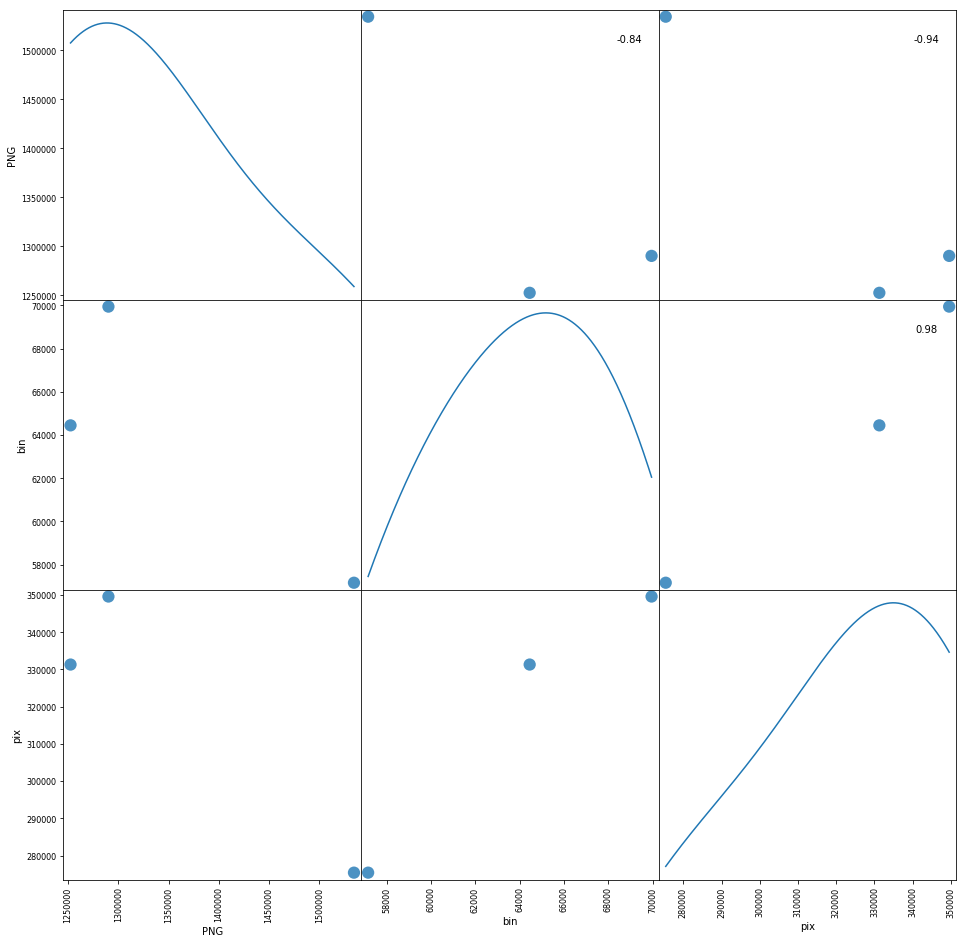

In [62]:
import ssl
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from pandas.plotting import scatter_matrix

data = pd.DataFrame({'PNG': [1290109, 1534390, 1252406], \
                    'bin': [69948, 57164, 64450]})

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

negro = (0, 0, 0)
blanco = (255, 255, 255)
umbral = 90 
    
pix = []
for ejemplo in range(1, 4): # de uno a cinco
    if ejemplo == 1:
        imagen = Image.open("imagen1.png")
    if ejemplo == 2:   
        imagen = Image.open("imagen2.png")
    if ejemplo == 3:   
        imagen = Image.open("imagen3.png")
    n = imagen.convert('RGB') 
    w, h = n.size
    P = n.load()
    for f in range(h): # bordes verticales
        if P[0, f] == negro:
            ImageDraw.floodfill(n, (0, f), blanco)
        if P[w - 1, f] == negro:
            ImageDraw.floodfill(n, (w - 1, f), blanco)
    for c in range(w): # bordes horizontales
        if P[c, 0] == negro:
            ImageDraw.floodfill(n, (c, 0), blanco)
        if P[c, h - 1] == negro:
            ImageDraw.floodfill(n, (c, h - 1), blanco) 
    for f in range(h): 
        for c in range(w):
            rgb = P[c, f]
            if max(rgb) - min(rgb) > umbral: # tiene un color que no es gris 
                P[c, f] = blanco
    b = n.convert('1') # binaricemos lo que queda
    P = b.load()
    negros = 0
    for f in range(h): 
        for c in range(w):
            if P[c, f] == 0:
                negros += 1
    pix.append(negros)

data['pix'] = pix
# visualización basado en la discusión de
# https://stackoverflow.com/questions/27768677/pandas-scatter-matrix-display-correlation-coefficient
ax = scatter_matrix(data, alpha = 0.8, figsize = (16, 16), diagonal = 'kde', s = 600)
c = data.corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('{:.2f}'.format(c[i, j]), (0.9, 0.9), \
                      xycoords = 'axes fraction', ha = 'center', va = 'center')
plt.show() 

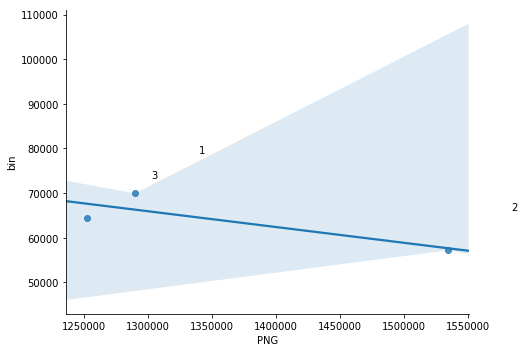

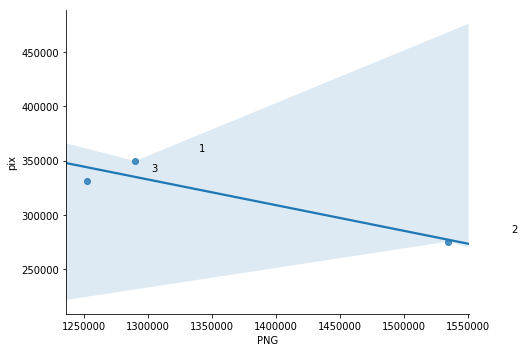

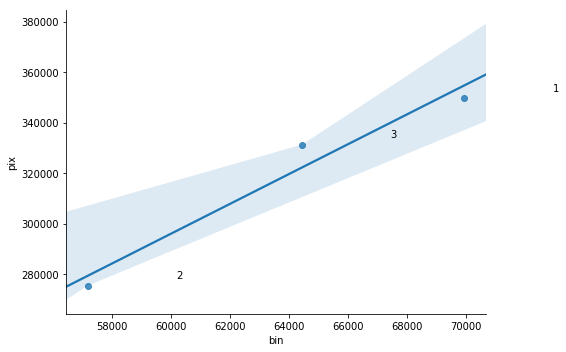

In [65]:
import ssl
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image, ImageDraw

data = pd.DataFrame({'lbl': [x for x in range(1, 4)], \
                    'PNG': [1290109, 1534390, 1252406], \
                    'bin': [69948, 57164, 64450]})

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

negro = (0, 0, 0)
blanco = (255, 255, 255)
umbral = 90 
    
pix = []
for ejemplo in range(1, 4): # de uno a cinco
    if ejemplo == 1:
        imagen = Image.open("imagen1.png")
    if ejemplo == 2:   
        imagen = Image.open("imagen2.png")
    if ejemplo == 3:   
        imagen = Image.open("imagen3.png")
    n = imagen.convert('RGB') 
    w, h = n.size
    P = n.load()
    for f in range(h): # bordes verticales
        if P[0, f] == negro:
            ImageDraw.floodfill(n, (0, f), blanco)
        if P[w - 1, f] == negro:
            ImageDraw.floodfill(n, (w - 1, f), blanco)
    for c in range(w): # bordes horizontales
        if P[c, 0] == negro:
            ImageDraw.floodfill(n, (c, 0), blanco)
        if P[c, h - 1] == negro:
            ImageDraw.floodfill(n, (c, h - 1), blanco) 
    for f in range(h): 
        for c in range(w):
            rgb = P[c, f]
            if max(rgb) - min(rgb) > umbral: # tiene un color que no es gris 
                P[c, f] = blanco
    b = n.convert('1') # binaricemos lo que queda
    P = b.load()
    negros = 0
    for f in range(h): 
        for c in range(w):
            if P[c, f] == 0:
                negros += 1
    pix.append(negros)

data['pix'] = pix

# etiquetado de https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
def label_point(x, y, xoffset, yoffset, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + xoffset, point['y'] + yoffset, str(point['val']))


        
sns.lmplot(x = 'PNG', y = 'bin',data=data, fit_reg = True, height = 5, aspect = 1.4) 
label_point(data.PNG, data.bin, 50000, 9000, data.lbl, plt.gca())

sns.lmplot(x = 'PNG', y = 'pix',data=data, fit_reg = True, height = 5, aspect = 1.4) 
label_point(data.PNG, data.pix, 50000, 9000, data.lbl, plt.gca())
                             
sns.lmplot(x = 'bin', y = 'pix',data=data, fit_reg = True, height = 5, aspect = 1.4) 
label_point(data.bin, data.pix, 3000, 3000, data.lbl, plt.gca())                             

Por el resultado obtenido en las gráficas y en los resultados obtenidos en los procesos de binarizacion de las imágenes no se ven buenos resultados, ya sea por la calidad de las imágenes o porque no son las originales, ya que al ser fotocopias se agrega mucho ruido y sombras a la fotografía que son más difíciles de eliminar. Dado esto no se pudo obtener mucha información de las imágenes, solo en algún modo la cantidad de dibujo, expresado en cantidad de pixeles, que hicieron los internos en estas 3 imágenes.